<a href="https://colab.research.google.com/github/alickd/SEP740_DLProject/blob/main/Text_Summarization_Deep_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text Summarizer

In [ ]:
!pip install transformers
!pip install sumy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import re
import string
from keras.preprocessing.text import Tokenizer 
from sklearn.model_selection import train_test_split

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

import gensim
from gensim.parsing.preprocessing import remove_stopwords

from tensorflow import keras
from keras.utils.data_utils import pad_sequences
import keras_preprocessing
from keras.preprocessing import text,sequence
from keras_preprocessing.text import Tokenizer
from tensorflow.keras.models import Model
from keras.layers import Input,Dense,Embedding,LSTM,Dropout, RepeatVector, concatenate

In [16]:
#Import and read dataset
path  = "/content/drive/MyDrive/Deep Learning Project/Reviews.xlsx"
df_reviews = pd.read_csv(path)
df_reviews.drop(columns=['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Score','Time'],inplace=True,axis=1)
df_reviews.dropna(axis=0,inplace=True)
df_reviews.head(5)

,Summary,Text
0,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,"""Delight"" says it all",This is a confection that has been around a fe...
3,Cough Medicine,If you are looking for the secret ingredient i...
4,Great taffy,Great taffy at a great price. There was a wid...


LSA Machine Learning Model Summary

In [17]:
# Import the summarizer 
import sumy
from sumy.summarizers.lsa import LsaSummarizer 

# Text to summarize 
original_text = df_reviews.Text[67] 

# Parsing the text string using PlaintextParser 
from sumy.nlp.tokenizers import Tokenizer 
from sumy.parsers.plaintext import PlaintextParser 

parser=PlaintextParser.from_string(original_text,Tokenizer('english')) 

# Creating the summarizer 
lsa_summarizer=LsaSummarizer() 
lsa_summary= lsa_summarizer(parser.document,3) 

# Printing the summary 
print(original_text)
print("---------------------------------------------------------------------")
print("Summary")
for sentence in lsa_summary: 
    print(sentence) 

I purchased the Mango flavor, and to me it doesn't take like Mango at all.  There is no hint of sweetness, and unfortunately there is a hint or aftertaste almost like licorice.  I've been consuming various sports nutrition products for decades, so I'm familiar and have come to like the taste of the most of the products I've tried.  The mango flavor is one of the least appealing I've tasted.  It's not terrible, but it's bad enough that I notice the bad taste every sip I take.
---------------------------------------------------------------------
Summary
There is no hint of sweetness, and unfortunately there is a hint or aftertaste almost like licorice.
I've been consuming various sports nutrition products for decades, so I'm familiar and have come to like the taste of the most of the products I've tried.
It's not terrible, but it's bad enough that I notice the bad taste every sip I take.


Pre-Processing Text Data

In [18]:
print("Before Pre-Processing")
for i in range(3):
  print("Review ", i+1)
  print(df_reviews['Text'][i])

Before Pre-Processing
Review  1
I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
Review  2
Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".
Review  3
This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Siste

In [19]:
def clean_text(text):
  #Removing numbers
  text = re.sub('[^a-zA-Z]', ' ', text)
  #Convert text into lower case
  text = text.lower()
  #Remove URL links
  text = re.sub(r'http\S+',' ',text)
  #Removing extra spaces/lines
  text = re.sub(' +',' ',text)
  #Removing punctuation
  text = re.sub('[^\w\s]','',text)
  #Removing stopwords
  text = remove_stopwords(text)
  return text

In [20]:
#Pre-Processing Text Data
df_reviews["Summary"] = df_reviews["Summary"].apply(clean_text)
df_reviews["Text"] = df_reviews["Text"].apply(clean_text)

In [11]:
print("After Pre-Processing")
for i in range(3):
  print("Review ", i+1)
  print(df_reviews['Text'][i])

After Pre-Processing
Review  1
bought vitality canned dog food products good quality product looks like stew processed meat smells better labrador finicky appreciates product better
Review  2
product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo
Review  3
confection centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story c s lewis lion witch wardrobe treat seduces edmund selling brother sisters witch


Visualize the Data

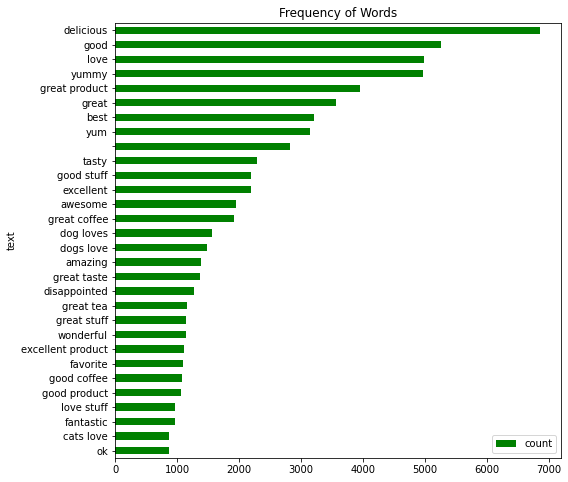

In [12]:
import itertools
import collections

lemmatized_tokens = list(df_reviews["Summary"])
token_list = list(itertools.chain(lemmatized_tokens))

counts_no=collections.Counter(token_list)
clean_words = pd.DataFrame(counts_no.most_common(30),columns=['text','count'])
fig,ax = plt.subplots(figsize=(8,8))
clean_words.sort_values(by='count').plot.barh(x='text',y='count',ax=ax,color='green')
ax.set_title("Frequency of Words")
plt.show()

In [ ]:
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in df_reviews['Text']:
      text_word_count.append(len(i.split()))

for i in df_reviews['Summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'Text':text_word_count, 'Summary':summary_word_count})

length_df.hist(bins = 30)
plt.show()

In [ ]:
X_text = df_reviews['Text'].iloc[:100]
y_summary = df_reviews['Summary'].iloc[:100]

X_train,X_test,Y_train,Y_test=train_test_split(X_text,y_summary,test_size=0.6)

print(X_train[0])
print(Y_train[0])

Hugging Face Transformers - Pretrained Model

In [ ]:
import transformers
from transformers import TFAutoModelForSeq2SeqLM, AutoTokenizer
from transformers import pipeline
from transformers import DataCollatorForSeq2Seq
from transformers import Trainer, TrainingArguments

model = TFAutoModelForSeq2SeqLM.from_pretrained("facebook/bart-large-cnn")
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-cnn")

In [ ]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

In [ ]:
train_encodings = tokenizer(X_train, truncation = True, padding = True)
test_encodings = tokenizer(X_test, truncation = True, padding = True)

In [ ]:
summarizer = pipeline("summarization", model="facebook/bart-large-cnn", tokenizer = "facebook/bart-large-cnn")

In [ ]:
sum_generated = summarizer(df_reviews['Text'][67])

In [ ]:
input_ids = tokenizer.encode(df_reviews['Text'][5], return_tensors='tf',truncation=True)
greedy_output = model.generate(input_ids)

In [ ]:
df_reviews["Text"][5]

In [ ]:
tokenizer.decode(greedy_output[0], skip_special_tokens=True)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam')

In [ ]:
model.fit(X_train, Y_train)

In [ ]:
print(summary)

In [ ]:
#Tokenization
max_vocab = 1000
max_length = 200

token = Tokenizer(num_words=max_vocab)
token.fit_on_texts(X_train)

#Tokenize Train
x_train_token = token.texts_to_sequences(X_train)
x_train = pad_sequences(x_train_token, maxlen = max_length)

y_train_token = token.texts_to_sequences(Y_train)
y_train = pad_sequences(y_train_token, maxlen = max_length)

#Tokenize Test
x_test_token = token.texts_to_sequences(X_test)
x_test = pad_sequences(x_test_token, maxlen = max_length)

y_test_token = token.texts_to_sequences(Y_test)
y_test = pad_sequences(y_train_token, maxlen = max_length)

print(X_train) #text data
print(x_train) #text data in tokens
print(y_train)

In [ ]:
print(tokenizer.decode(outputs[1], skip_special_tokens=True))

In [ ]:
print(tokenizer.convert_ids.to_tokens)

In [ ]:
df_reviews['Text'][2]

In [ ]:
df_reviews['Summary'][2]

In [ ]:
print (summarizer(X_train[2]))

In [ ]:
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

In [ ]:
#for i in range(5):
print (summarizer(X_test))

In [ ]:
df_reviews["Text"][6]

In [ ]:
df_reviews["Summary"][6]

In [ ]:
vocab_size = 100
src_txt_length = 1000
sum_txt_length = 100
# article input model
inputs1 = Input(shape=(src_txt_length,))
article1 = Embedding(vocab_size, 128)(inputs1)
article2 = LSTM(128)(article1)
article3 = RepeatVector(sum_txt_length)(article2)
# summary input model
inputs2 = Input(shape=(sum_txt_length,))
summ1 = Embedding(vocab_size, 128)(inputs2)
# decoder model
decoder1 = concatenate([article3, summ1])
decoder2 = LSTM(128)(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)
# tie it together [article, summary] [word]
DL_Model = Model(inputs=[inputs1, inputs2], outputs=outputs)
DL_Model.compile(loss='categorical_crossentropy', optimizer='adam')


In [ ]:
DL_Model.fit(x_train,y_train,verbose=2)

In [ ]:
def define_models(n_input, n_output, n_units):
# define training encoder
  encoder_inputs = Input(shape=(None, n_input))
  encoder = LSTM(n_units, return_state=True)
  encoder_outputs, state_h, state_c = encoder(encoder_inputs)
  encoder_states = [state_h, state_c]
# define training decoder
  decoder_inputs = Input(shape=(None, n_output))
  decoder_lstm = LSTM(n_units, return_sequences=True, return_state=True)
  decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
  decoder_dense = Dense(n_output, activation='softmax')
  decoder_outputs = decoder_dense(decoder_outputs)
  model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
# define inference encoder
  encoder_model = Model(encoder_inputs, encoder_states)
# define inference decoder
  decoder_state_input_h = Input(shape=(n_units,))
  decoder_state_input_c = Input(shape=(n_units,))
  decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
  decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs,  initial_state=decoder_states_inputs)
  decoder_states = [state_h, state_c]
  decoder_outputs = decoder_dense(decoder_outputs)
  decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)
# return all models
  return model, encoder_model, decoder_model

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Training the Model

In [ ]:
model.fit